### Exponential Smoothing -  Time Series

Perform the forecasting of the monthly sales using Exponntial Smoothening method:

#### Steps used in this Algorithm:-

1.  Import all the necessary libraries

2.  Create a Sample Time Series Dataset

3.  Visualize the Time Series

4.  Perform Simple Exponential Smoothing 

5.  Perform Holt’s Linear Trend Method

6.  Perform Holt-Winters (Trend + Seasonality)

7.  Forecast Future Values (Next 12 Months)

8.  Plot Forecasts


### Step 1: Import all the necessary Libraries

In [587]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

from   statsmodels.tsa.holtwinters import(
    SimpleExpSmoothing                ,
    ExponentialSmoothing
)

### Step 2:  Create a Sample Time Series Dataset

In [588]:
# Create monthly date range
date_range = pd.date_range(start="2018-01", end="2023-12", freq="M")

# Generate synthetic sales data
np.random.seed(42)
sales = 200 + np.random.normal(0, 20, len(date_range)) + np.arange(len(date_range)) * 1.5

# Create DataFrame
df = pd.DataFrame({
    "Date": date_range,
    "Sales": sales
})


df

C:\Users\parag.pujari\AppData\Local\Temp\ipykernel_14476\4255863299.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start="2018-01", end="2023-12", freq="M")


,Date,Sales
0,2018-01-31,209.934283
1,2018-02-28,198.734714
2,2018-03-31,215.953771
3,2018-04-30,234.960597
4,2018-05-31,201.316933
...,...,...
66,2023-07-31,297.559798
67,2023-08-31,320.570658
68,2023-09-30,309.232721
69,2023-10-31,290.597605


In [589]:
### Set the Date column as Index

df.set_index("Date", inplace = True)

In [590]:
### Sort the dataset in the ascending order of "Date"

df.sort_values(by="Date")

,Sales
Date,
2018-01-31,209.934283
2018-02-28,198.734714
2018-03-31,215.953771
2018-04-30,234.960597
2018-05-31,201.316933
...,...
2023-07-31,297.559798
2023-08-31,320.570658
2023-09-30,309.232721


### OBSERVATIONS:

1.  The above dataset shows the month wise distribution of the total sales.

### Step 3:  Visualize the Time Series

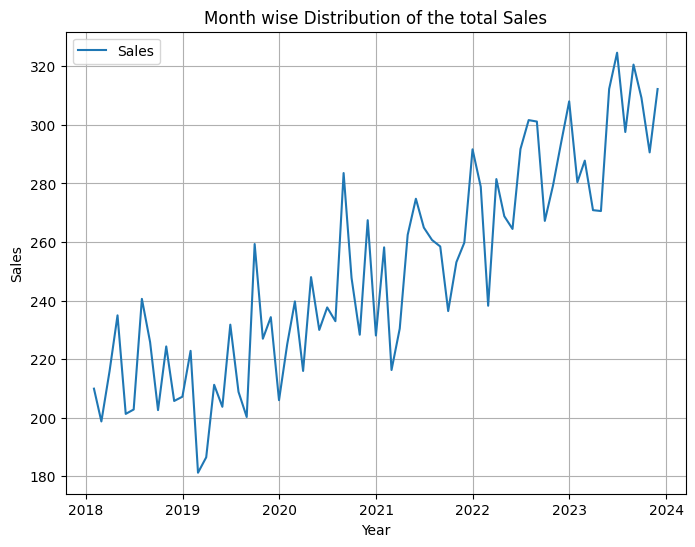

In [591]:
plt.figure(figsize=(8,6))

### performing the plotting between the date and the sales
plt.plot(df['Sales'], label = 'Sales')

plt.title("Month wise Distribution of the total Sales")

plt.xlabel("Year")

plt.ylabel("Sales")

plt.legend()

plt.grid() 

plt.show()

### OBSERVATIONS:

1. The above graph depicts about the month wise  distribution of the sales data in every year.

### Step 4: Perform Simple Exponential Smoothing 


Simple Exponential Smoothing is a time series forecasting technique that is used to smoothen the data and make the short term predictions when the data has 

  (a.)   no   trend

  (b.)   no   seasonality

In [592]:
### Create an object for Simple Exp Smoothing

ses_model = SimpleExpSmoothing(df['Sales'])

### Train the Simple Exp Smoothing model
ses_fit_data = ses_model.fit(smoothing_level=0.3)

C:\Users\parag.pujari\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\parag.pujari\AppData\Roaming\Python\Python313\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [593]:
ses_fit_data

In [594]:
### stores the predicted values in a new column in the dataframe

df["SES_predicted_data"]  = ses_fit_data.fittedvalues

In [595]:
df

,Sales,SES_predicted_data
Date,,
2018-01-31,209.934283,209.934283
2018-02-28,198.734714,209.934283
2018-03-31,215.953771,206.574412
2018-04-30,234.960597,209.388220
2018-05-31,201.316933,217.059933
...,...,...
2023-07-31,297.559798,299.800299
2023-08-31,320.570658,299.128149
2023-09-30,309.232721,305.560902


### OBSERVATIONS:

1. Simple Exp Smoothing is a time series forecasting technique that is used to smoothen the data.

2. It is used to perform the short term predictions when the data has no trend and no seasonality.

### Step 5:  Perform Holt’s Linear Trend Method


Holt's Linear trend method is a time series forecasting method where trend exists but no seasonality exists.

In [596]:
#### create an object for Holtz linear trend model 

holtz_obj = ExponentialSmoothing(
    df['Sales']                 ,
    trend = 'add'               ,
    seasonal = None
)

C:\Users\parag.pujari\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [597]:
### using the holtz linear trend model, train the data

holtz_obj_train_data = holtz_obj.fit(smoothing_level=0.3)

In [598]:
holtz_obj_train_data

In [599]:
### predict the data and store it in a new column

df['holtz_linear_data'] = holtz_obj_train_data.fittedvalues

In [600]:
df

,Sales,SES_predicted_data,holtz_linear_data
Date,,,
2018-01-31,209.934283,209.934283,208.146820
2018-02-28,198.734714,209.934283,210.113767
2018-03-31,215.953771,206.574412,208.130759
2018-04-30,234.960597,209.388220,211.908370
2018-05-31,201.316933,217.059933,220.254746
...,...,...,...
2023-07-31,297.559798,299.800299,304.569326
2023-08-31,320.570658,299.128149,303.897175
2023-09-30,309.232721,305.560902,310.329928


### Step 6: Perform Holt-Winters (Trend + Seasonality)

Holt-Winters is a time series forecasting model that is used to smoothen the data and make the short term predictions when both trend and seasonality exists.

In [601]:
### Create an object for Holtz-winter

holtz_winter_obj = ExponentialSmoothing(
    df['Sales']                         ,
    trend = 'add'                       ,
    seasonal = 'add'                    ,
    seasonal_periods = 12
)


### using the object for Holtz-winter, train the data

holtz_winter_train_data = holtz_winter_obj.fit(smoothing_level=0.3)

C:\Users\parag.pujari\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


In [602]:
holtz_winter_train_data

In [603]:
### predict the model

df['Holtz_winter_data'] = holtz_winter_train_data.fittedvalues

In [604]:
df

,Sales,SES_predicted_data,holtz_linear_data,Holtz_winter_data
Date,,,,
2018-01-31,209.934283,209.934283,208.146820,214.677530
2018-02-28,198.734714,209.934283,210.113767,194.365832
2018-03-31,215.953771,206.574412,208.130759,202.210945
2018-04-30,234.960597,209.388220,211.908370,222.135877
2018-05-31,201.316933,217.059933,220.254746,224.397952
...,...,...,...,...
2023-07-31,297.559798,299.800299,304.569326,309.410026
2023-08-31,320.570658,299.128149,303.897175,313.782645
2023-09-30,309.232721,305.560902,310.329928,304.603842


### Step 7: Forecast Future Values (Next 12 Months)

In [605]:
forecast_steps = 12


ses_data = ses_fit_data.forecast(forecast_steps)

In [606]:
ses_data


2023-12-31    304.95847
2024-01-31    304.95847
2024-02-29    304.95847
2024-03-31    304.95847
2024-04-30    304.95847
2024-05-31    304.95847
2024-06-30    304.95847
2024-07-31    304.95847
2024-08-31    304.95847
2024-09-30    304.95847
2024-10-31    304.95847
2024-11-30    304.95847
Freq: ME, dtype: float64

In [607]:
holtz_linear = holtz_obj_train_data.forecast(forecast_steps)

In [608]:
holtz_linear


2023-12-31    309.727496
2024-01-31    311.158204
2024-02-29    312.588912
2024-03-31    314.019620
2024-04-30    315.450328
2024-05-31    316.881036
2024-06-30    318.311744
2024-07-31    319.742452
2024-08-31    321.173160
2024-09-30    322.603868
2024-10-31    324.034575
2024-11-30    325.465283
Freq: ME, dtype: float64

In [609]:
holtz_winter = holtz_winter_train_data.forecast(forecast_steps)

In [610]:
holtz_winter

2023-12-31    307.030085
2024-01-31    310.979484
2024-02-29    292.090760
2024-03-31    298.625208
2024-04-30    314.427293
2024-05-31    312.841951
2024-06-30    324.012896
2024-07-31    322.130121
2024-08-31    330.057808
2024-09-30    318.842602
2024-10-31    315.536942
2024-11-30    327.282890
Freq: ME, dtype: float64

### OBSERVATIONS:

1. Here we have performed the forecasting of the data values for the next 12 months.

### Step 8:  Plot Forecasts

In [611]:
df

,Sales,SES_predicted_data,holtz_linear_data,Holtz_winter_data
Date,,,,
2018-01-31,209.934283,209.934283,208.146820,214.677530
2018-02-28,198.734714,209.934283,210.113767,194.365832
2018-03-31,215.953771,206.574412,208.130759,202.210945
2018-04-30,234.960597,209.388220,211.908370,222.135877
2018-05-31,201.316933,217.059933,220.254746,224.397952
...,...,...,...,...
2023-07-31,297.559798,299.800299,304.569326,309.410026
2023-08-31,320.570658,299.128149,303.897175,313.782645
2023-09-30,309.232721,305.560902,310.329928,304.603842


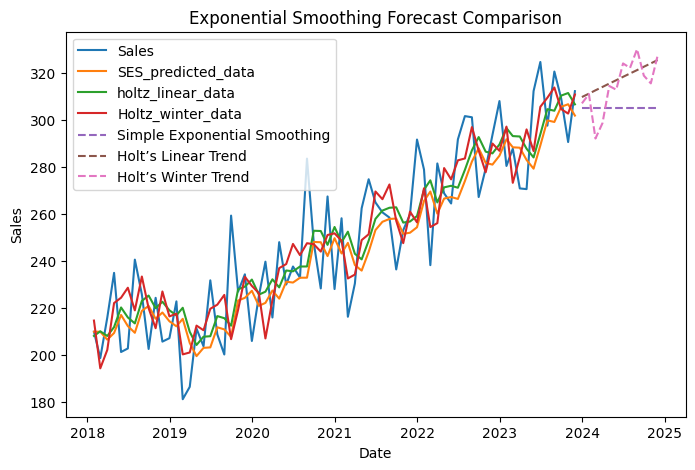

In [612]:
plt.figure(figsize=(8,5))


plt.plot(df['Sales'], label = 'Sales')
plt.plot(df['SES_predicted_data'], label = 'SES_predicted_data')
plt.plot(df['holtz_linear_data'],  label = 'holtz_linear_data')
plt.plot(df['Holtz_winter_data'],  label = 'Holtz_winter_data')


plt.plot(ses_data,     label = 'Simple Exponential Smoothing', linestyle='--')
plt.plot(holtz_linear, label = 'Holt’s Linear Trend', linestyle='--')
plt.plot(holtz_winter, label = 'Holt’s Winter Trend', linestyle='--')


plt.title("Exponential Smoothing Forecast Comparison")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

### OBSERVATIONS:

1. The above graph depicts about the various method comparisions of forecasting techniques in each month of every year.